<a href="https://colab.research.google.com/github/janahendy30/HealthCare-Provider-Fraud-Detection/blob/nour/01_data_exploration_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Train_Beneficiarydata-1542865627584.csv to Train_Beneficiarydata-1542865627584.csv


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Train_Outpatientdata-1542865627584.csv to Train_Outpatientdata-1542865627584.csv


In [4]:
from google.colab import files
uploaded = files.upload()


Saving Train_Inpatientdata-1542865627584.csv to Train_Inpatientdata-1542865627584.csv


In [5]:
from google.colab import files
uploaded = files.upload()


Saving Train-1542865627584.csv to Train-1542865627584.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [8]:
beneficiary = pd.read_csv("/content/Train_Beneficiarydata-1542865627584.csv")
inpatient = pd.read_csv("/content/Train_Inpatientdata-1542865627584.csv")
outpatient = pd.read_csv("/content/Train_Outpatientdata-1542865627584.csv")
labels = pd.read_csv("/content/Train-1542865627584.csv")

In [10]:
beneficiary.info()
inpatient.info()
outpatient.info()
labels.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [16]:
# Check basic structure of each dataframe (number of rows, columns, data types, missing values)
print("Beneficiary dataset:")
beneficiary.info()
print("\nInpatient dataset:")
inpatient.info()
print("\nOutpatient dataset:")
outpatient.info()
print("\nLabels dataset:")
labels.info()


Beneficiary dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 


In [18]:
print("Beneficiary dataset preview:")
print(beneficiary.head())

Beneficiary dataset preview:
      BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      2   
2     590                   12                   12                      1   
3     270                   12                   12                      1   
4     680                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_Kidn

In [19]:
print("\nInpatient dataset preview:")
print(inpatient.head())



Inpatient dataset preview:
      BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186      

In [20]:
print("\nOutpatient dataset preview:")
print(outpatient.head())



Outpatient dataset preview:
      BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0            NaN              78943              V5866              V1272   
1            NaN               6115      

In [17]:
beneficiary.head()
inpatient.head()
outpatient.head()
labels.head()


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [12]:
inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [13]:
outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [14]:
beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [15]:
print(beneficiary.columns)
print(inpatient.columns)
print(outpatient.columns)
print(labels.columns)


Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')
Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisC

In [ ]:
display(beneficiary.describe())
display(inpatient.describe())
display(outpatient.describe())


,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,1.762847,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,0.425339,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid
count,517737.000000,162.000000,36.000000,4.000000,2.000000,0.0,0.0,517737.000000
mean,286.334799,6116.611111,4503.277778,2959.000000,4075.500000,NaN,NaN,2.779233
std,694.034343,3217.719258,2504.015000,1863.455393,5323.806956,NaN,NaN,15.785839
min,0.000000,51.000000,412.000000,412.000000,311.000000,NaN,NaN,0.000000
25%,40.000000,3893.000000,2724.000000,2146.000000,2193.250000,NaN,NaN,0.000000
50%,80.000000,5244.500000,4019.000000,3511.500000,4075.500000,NaN,NaN,0.000000
75%,200.000000,9421.500000,5849.000000,4324.500000,5957.750000,NaN,NaN,0.000000
max,102500.000000,9999.000000,9982.000000,4401.000000,7840.000000,NaN,NaN,897.000000


In [ ]:
display(beneficiary.isnull().sum())
display(inpatient.isnull().sum())
display(outpatient.isnull().sum())
display(labels.isnull().sum())


,0
BeneID,0
DOB,0
DOD,137135
Gender,0
Race,0
RenalDiseaseIndicator,0
State,0
County,0
NoOfMonths_PartACov,0
NoOfMonths_PartBCov,0


,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
InscClaimAmtReimbursed,0
AttendingPhysician,112
OperatingPhysician,16644
OtherPhysician,35784
AdmissionDt,0


,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
InscClaimAmtReimbursed,0
AttendingPhysician,1396
OperatingPhysician,427120
OtherPhysician,322691
ClmDiagnosisCode_1,10453


,0
Provider,0
PotentialFraud,0


In [ ]:
#BeneID links patient → inpatient/outpatient claims//

#Provider links claims → fraud label/

In [ ]:
#The dataset contains a mixture of 0s and numerical values across many columns, but no actual NaN or null values. This indicates that the dataset is complete. The zeros represent valid recorded values (such as “no condition,” “no procedure,” or “reimbursed amount = 0”), rather than missing data.

#Therefore, no missing-value imputation is required. However, we will still analyze the meaning and distribution of zero values during EDA to ensure they are not acting as placeholders for missing information.


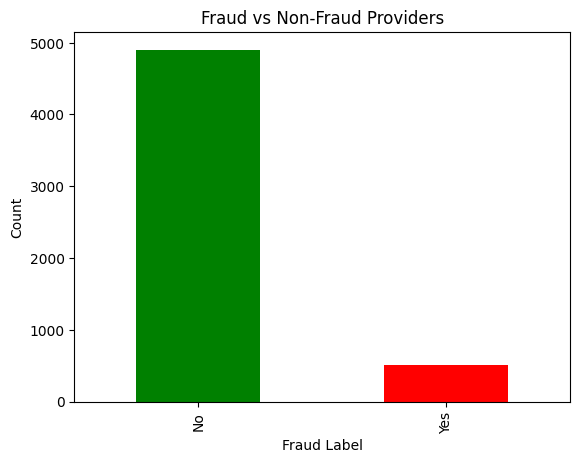

In [22]:
labels['PotentialFraud'].value_counts().plot(kind='bar', color=['green','red'])
plt.title("Fraud vs Non-Fraud Providers")
plt.xlabel("Fraud Label")
plt.ylabel("Count")
plt.show()
#Fraud is only ~10% → dataset is highly imbalanced.
## Plot the distribution of fraud vs non-fraud providers


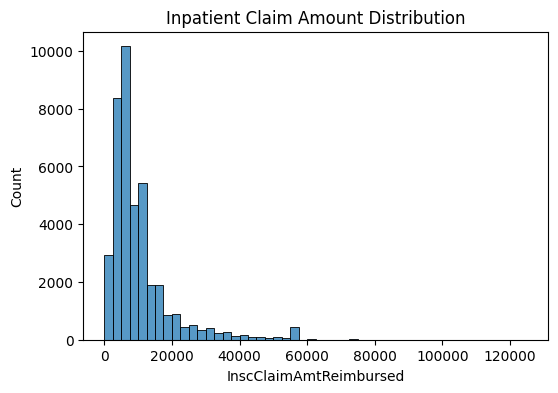

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(inpatient['InscClaimAmtReimbursed'], bins=50)
plt.title("Inpatient Claim Amount Distribution")
plt.show()


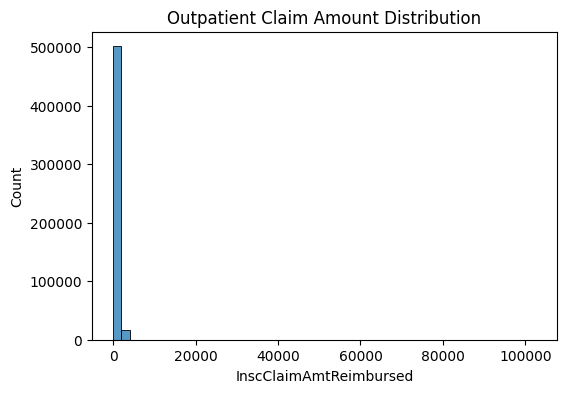

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(outpatient['InscClaimAmtReimbursed'], bins=50)
plt.title("Outpatient Claim Amount Distribution")
plt.show()


In [23]:
inpatient_merged = inpatient.merge(labels, on="Provider", how="left")
outpatient_merged = outpatient.merge(labels, on="Provider", how="left")


In [ ]:
inpatient_merged.groupby("PotentialFraud")['InscClaimAmtReimbursed'].mean()


,InscClaimAmtReimbursed
PotentialFraud,
No,9782.597821
Yes,10310.593539


In [ ]:
outpatient_merged.groupby("PotentialFraud")['InscClaimAmtReimbursed'].mean()


,InscClaimAmtReimbursed
PotentialFraud,
No,285.839838
Yes,287.192889


In [ ]:
inpatient_patients = inpatient_merged.groupby("Provider")["BeneID"].nunique().reset_index()
inpatient_patients = inpatient_patients.merge(labels, on="Provider")


In [ ]:
outpatient_patients = outpatient_merged.groupby("Provider")["BeneID"].nunique().reset_index()
outpatient_patients = outpatient_patients.merge(labels, on="Provider")


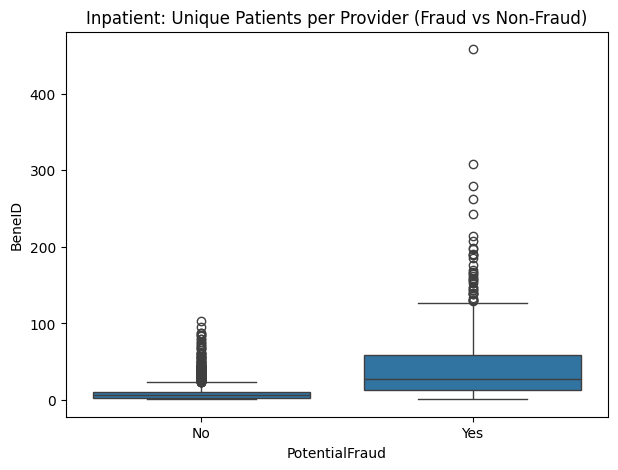

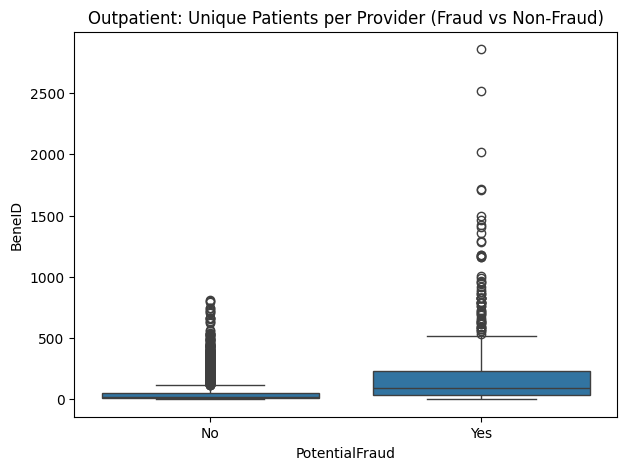

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(data=inpatient_patients, x="PotentialFraud", y="BeneID")
plt.title("Inpatient: Unique Patients per Provider (Fraud vs Non-Fraud)")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(data=outpatient_patients, x="PotentialFraud", y="BeneID")
plt.title("Outpatient: Unique Patients per Provider (Fraud vs Non-Fraud)")
plt.show()


In [ ]:
inpatient_cost = inpatient_merged.groupby("Provider")["InscClaimAmtReimbursed"].mean().reset_index()
inpatient_cost = inpatient_cost.merge(labels, on="Provider")


In [ ]:
outpatient_cost = outpatient_merged.groupby("Provider")["InscClaimAmtReimbursed"].mean().reset_index()
outpatient_cost = outpatient_cost.merge(labels, on="Provider")


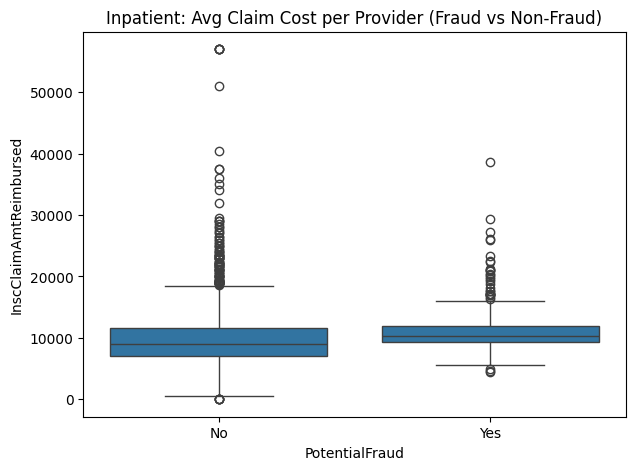

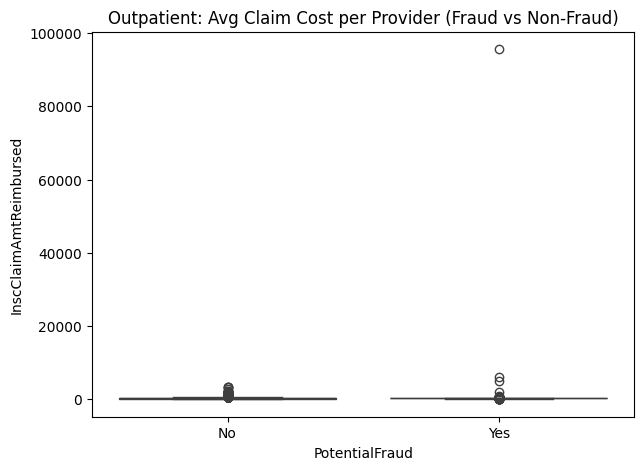

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(data=inpatient_cost, x="PotentialFraud", y="InscClaimAmtReimbursed")
plt.title("Inpatient: Avg Claim Cost per Provider (Fraud vs Non-Fraud)")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(data=outpatient_cost, x="PotentialFraud", y="InscClaimAmtReimbursed")
plt.title("Outpatient: Avg Claim Cost per Provider (Fraud vs Non-Fraud)")
plt.show()


In [ ]:
inpatient_claims = inpatient_merged.groupby("Provider")["ClaimID"].count().reset_index()
inpatient_claims = inpatient_claims.merge(labels, on="Provider")


In [ ]:
outpatient_claims = outpatient_merged.groupby("Provider")["ClaimID"].count().reset_index()
outpatient_claims = outpatient_claims.merge(labels, on="Provider")


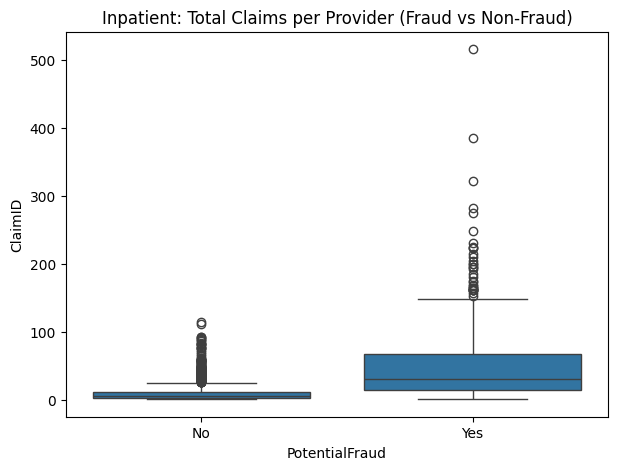

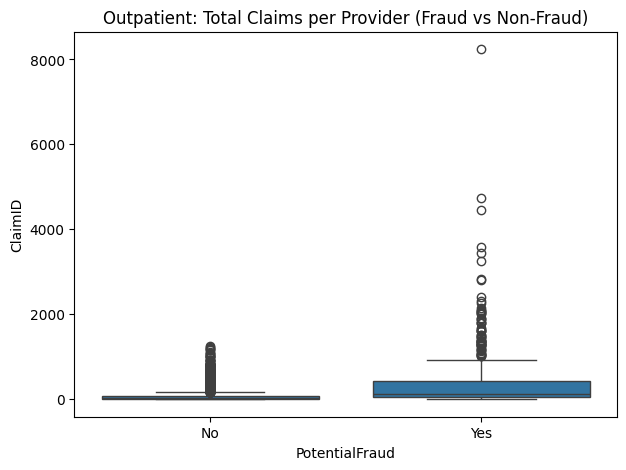

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(data=inpatient_claims, x="PotentialFraud", y="ClaimID")
plt.title("Inpatient: Total Claims per Provider (Fraud vs Non-Fraud)")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(data=outpatient_claims, x="PotentialFraud", y="ClaimID")
plt.title("Outpatient: Total Claims per Provider (Fraud vs Non-Fraud)")
plt.show()


In [ ]:
procedure_columns = [col for col in inpatient_merged.columns if 'ClmProcedureCode_' in col]
inpatient_merged['NumProcedures'] = inpatient_merged[procedure_columns].notna().sum(axis=1)
inpatient_procedures = inpatient_merged.groupby("Provider")['NumProcedures'].sum().reset_index(name='TotalProcedures')
inpatient_procedures = inpatient_procedures.merge(labels, on="Provider")

In [ ]:
procedure_columns = [col for col in outpatient_merged.columns if 'ClmProcedureCode_' in col]
outpatient_merged['NumProcedures'] = outpatient_merged[procedure_columns].notna().sum(axis=1)
outpatient_procedures = outpatient_merged.groupby("Provider")['NumProcedures'].sum().reset_index(name='TotalProcedures')
outpatient_procedures = outpatient_procedures.merge(labels, on="Provider")

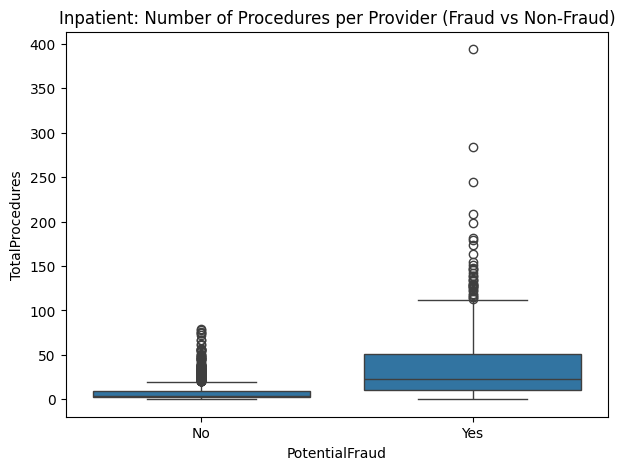

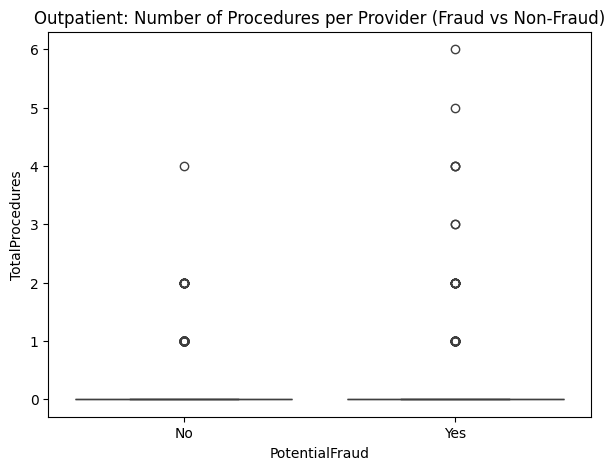

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(data=inpatient_procedures, x="PotentialFraud", y="TotalProcedures")
plt.title("Inpatient: Number of Procedures per Provider (Fraud vs Non-Fraud)")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(data=outpatient_procedures, x="PotentialFraud", y="TotalProcedures")
plt.title("Outpatient: Number of Procedures per Provider (Fraud vs Non-Fraud)")
plt.show()

In [ ]:
#Fraud vs Non-Fraud Provider Behavior Analysis

#We compared the behavior of fraudulent and non-fraudulent providers using four key metrics:

#1-Number of procedures per provider

#2-Number of unique patients per provider

#3-Average claim cost per provider

#4-Total number of claims per provider
#Across most visualizations, fraudulent providers tend to show:

#Higher number of claims

#Higher procedure counts

#Higher average reimbursement

#More unique patients

In [ ]:
numeric_inpatient = inpatient.select_dtypes(include=['int64', 'float64'])
numeric_outpatient = outpatient.select_dtypes(include=['int64', 'float64'])
numeric_beneficiary = beneficiary.select_dtypes(include=['int64', 'float64'])
#Extracting numeric columns


In [ ]:
corr_inpatient = numeric_inpatient.corr()
corr_outpatient = numeric_outpatient.corr()
corr_beneficiary = numeric_beneficiary.corr()
#Computing correlation


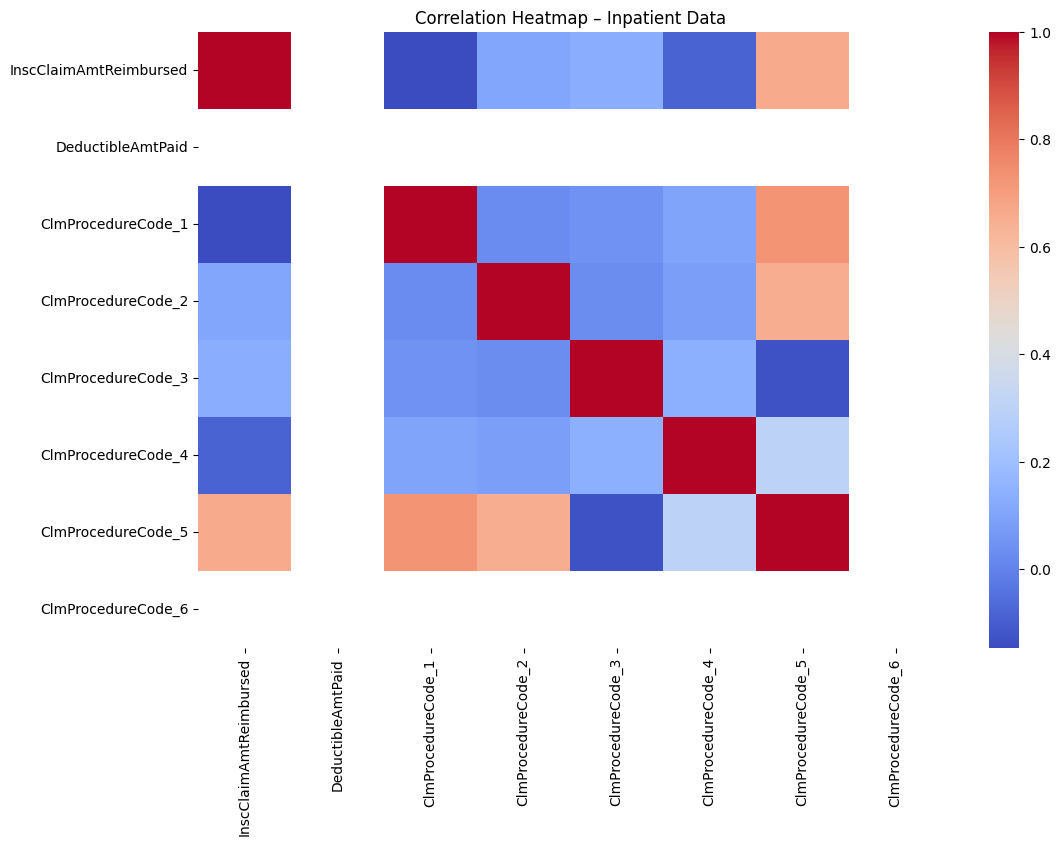

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_inpatient, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap – Inpatient Data")
plt.show()


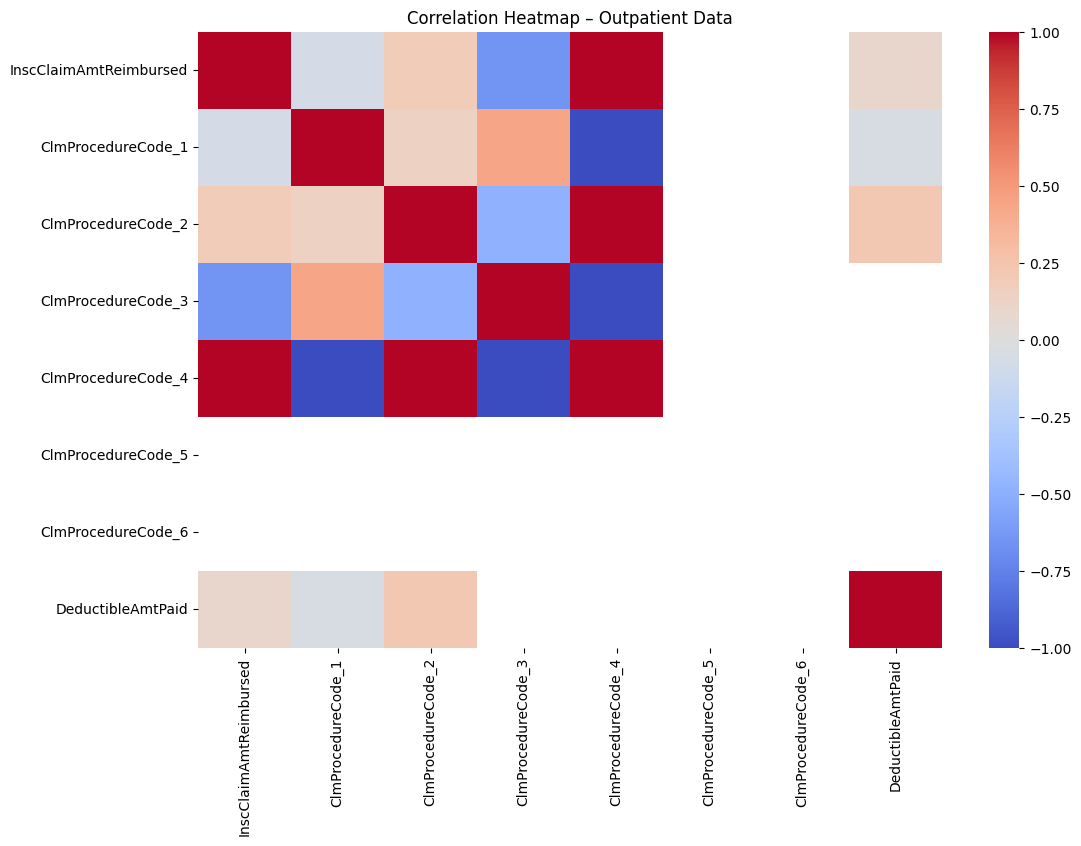

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_outpatient, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap – Outpatient Data")
plt.show()


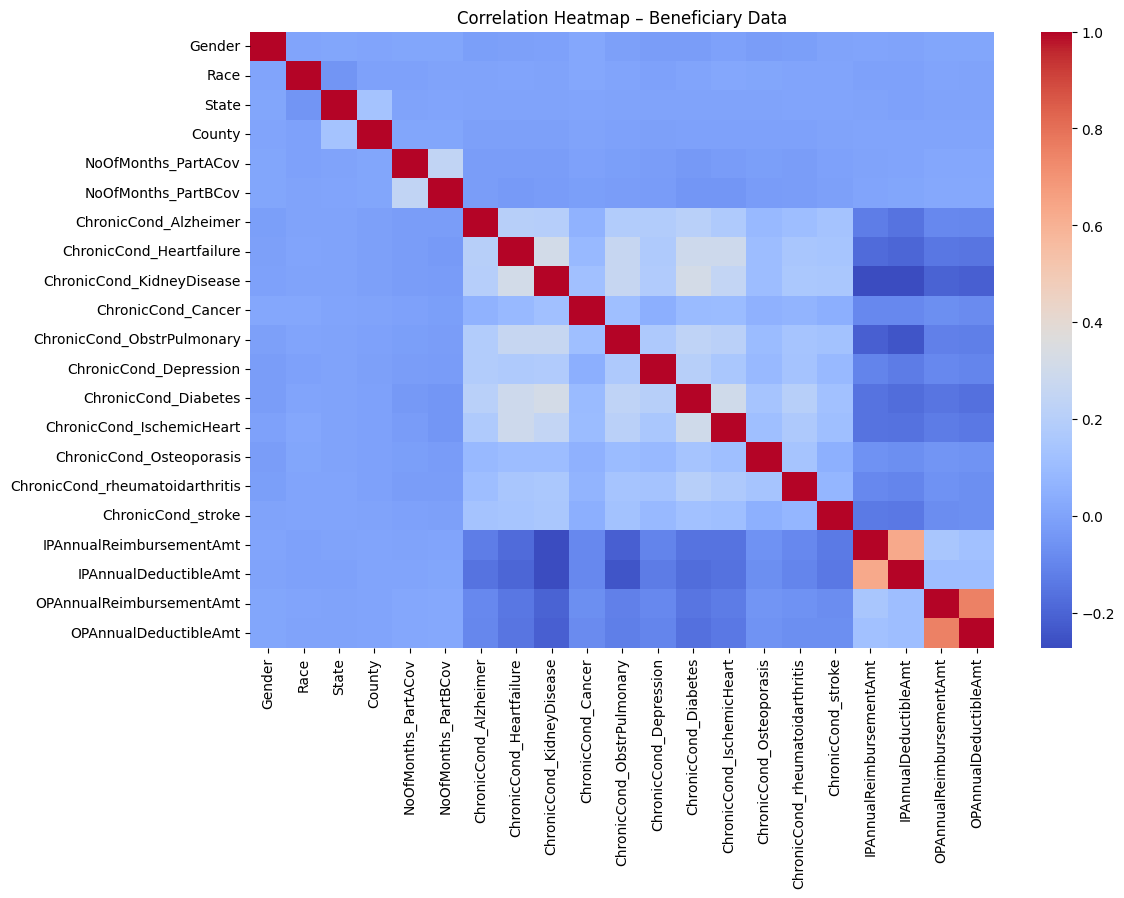

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_beneficiary, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap – Beneficiary Data")
plt.show()


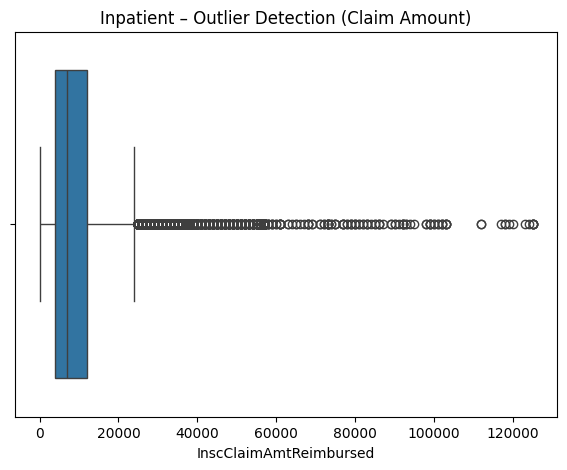

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x=inpatient["InscClaimAmtReimbursed"])
plt.title("Inpatient – Outlier Detection (Claim Amount)")
plt.show()
#Inpatient Claim Amount Outliers

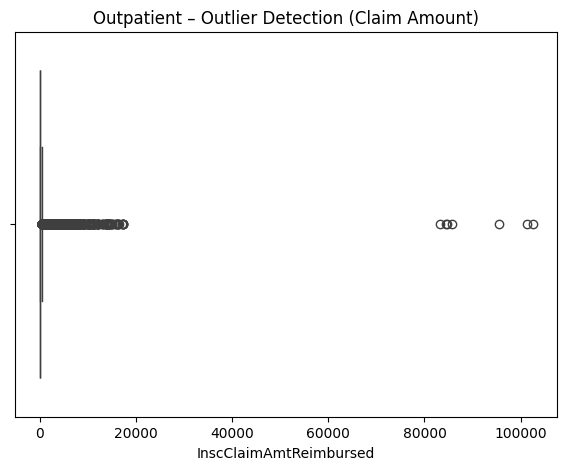

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x=outpatient["InscClaimAmtReimbursed"])
plt.title("Outpatient – Outlier Detection (Claim Amount)")
plt.show()
#Outpatient Claim Amount Outliers

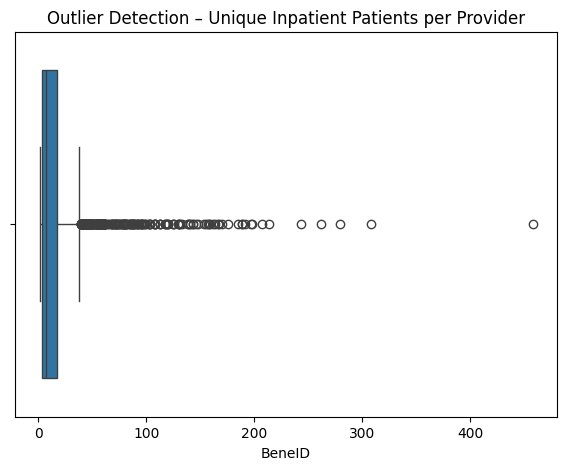

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x=inpatient_patients["BeneID"])
plt.title("Outlier Detection – Unique Inpatient Patients per Provider")
plt.show()
#Patients per Provider Outliers

In [ ]:
#Correlation Analysis

#To understand relationships between numeric variables, we computed separate correlation heatmaps for inpatient, outpatient, and beneficiary datasets.

#Since the data is highly structured and contains many categorical identifiers (BeneID, Provider, procedure codes), only numeric columns were used.

#Key Observations

#Chronic condition indicators in the beneficiary dataset show some correlation, reflecting comorbidity patterns.

#In inpatient claims, reimbursement amount correlates moderately with number of procedures and duration of stay.

#Outpatient correlations are weaker, indicating more variability in outpatient services.

#No extreme multicollinearity was found, which is good for modeling stability later.

#Outlier Detection

#Boxplots for claim reimbursement amounts and patient counts per provider show clear outliers. These outliers are expected in real medical data but are also important indicators of fraud (e.g., unusually high claim amounts, excessive procedures, or a very large patient pool).

#These outliers will be preserved (not removed) because they may represent fraudulent behavior and are crucial signals for the model.

In [ ]:
print("Inpatient columns:\n", inpatient.columns)
print("\nOutpatient columns:\n", outpatient.columns)
print("\nBeneficiary columns:\n", beneficiary.columns)


Inpatient columns:
 Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

Outpatient columns:
 Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_

In [24]:
inpatient_proc_cols = [col for col in inpatient.columns if "ClmProcedureCode" in col]
outpatient_proc_cols = [col for col in outpatient.columns if "ClmProcedureCode" in col]
#FEATURE ENGINERRING

In [25]:
inpatient["Total_Procedures"] = inpatient[inpatient_proc_cols].notnull().sum(axis=1)
# Count Total Procedures Per Claim

In [27]:
outpatient["Total_Procedures"] = outpatient[outpatient_proc_cols].notnull().sum(axis=1)
## Count Total Procedures Per Claim

In [28]:
inpatient_provider = inpatient.groupby("Provider").agg({
    "BeneID": "nunique",                      # Unique patients
    "ClaimID": "count",                       # Total claims
    "InscClaimAmtReimbursed": ["sum", "mean", "max"],
    "Total_Procedures": ["sum", "mean", "max"],   # Total procedures per claim
    "AttendingPhysician": "nunique",
    "OperatingPhysician": "nunique"
})
#Aggregate Inpatient Features Per Provider

In [29]:
inpatient_provider.columns = ["Inpatient_" + "_".join(col) for col in inpatient_provider.columns]
inpatient_provider.reset_index(inplace=True)


In [30]:
outpatient_provider = outpatient.groupby("Provider").agg({
    "BeneID": "nunique",
    "ClaimID": "count",
    "InscClaimAmtReimbursed": ["sum", "mean", "max"],
    "Total_Procedures": ["sum", "mean", "max"],
    "AttendingPhysician": "nunique",
    "OperatingPhysician": "nunique"
})
#Aggregate Outpatient Features Per Provider

In [33]:
outpatient_provider = outpatient.groupby("Provider").agg({
    "BeneID": "nunique",
    "ClaimID": "count",
    "InscClaimAmtReimbursed": ["sum", "mean", "max"],
    "Total_Procedures": ["sum", "mean", "max"],
    "AttendingPhysician": "nunique",
    "OperatingPhysician": "nunique"
})
#Aggregate Outpatient Features Per Provider

In [34]:
outpatient_provider.columns = ["Outpatient_" + "_".join(col) for col in outpatient_provider.columns]
outpatient_provider.reset_index(inplace=True)


In [36]:
claim_bene = pd.concat([
    inpatient[['Provider', 'BeneID']],
    outpatient[['Provider', 'BeneID']]
]).drop_duplicates()
#Merge Beneficiary Features with Provider
#Create Provider–Beneficiary linkage

In [37]:
claim_bene = claim_bene.merge(beneficiary, on="BeneID", how="left")
#Merge with beneficiary table

In [44]:
# Convert DOB to datetime format (handle errors for invalid dates)
claim_bene['DOB'] = pd.to_datetime(claim_bene['DOB'], errors='coerce')

# Compute Age based on DOB (current year 2025)
claim_bene['Age'] = 2025 - claim_bene['DOB'].dt.year


In [41]:
# Print columns to verify
print(claim_bene.columns)


Index(['Provider', 'BeneID', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt'],
      dtype='object')


In [45]:
beneficiary_cols = [
    "Age",
    "ChronicCond_Alzheimer",
    "ChronicCond_Heartfailure",
    "ChronicCond_Cancer",
    "ChronicCond_Diabetes",
    "ChronicCond_KidneyDisease",
    "ChronicCond_ObstrPulmonary",
    "ChronicCond_Depression",
    "ChronicCond_IschemicHeart",
    "ChronicCond_Osteoporasis",
    "ChronicCond_rheumatoidarthritis",
    "ChronicCond_stroke"
]

# Aggregate beneficiary features by provider
beneficiary_provider = claim_bene.groupby("Provider")[beneficiary_cols].mean().reset_index()

# Rename columns for clarity
beneficiary_provider = beneficiary_provider.add_prefix("Bene_")
beneficiary_provider.rename(columns={"Bene_Provider": "Provider"}, inplace=True)


In [46]:
# Merge all the provider-level features into one final dataframe
provider_df = labels.merge(inpatient_provider, on="Provider", how="left")
provider_df = provider_df.merge(outpatient_provider, on="Provider", how="left")
provider_df = provider_df.merge(beneficiary_provider, on="Provider", how="left")

# Save the final provider features to CSV
provider_df.to_csv("provider_features.csv", index=False)


In [47]:
provider_df = provider_df.fillna(0)


In [48]:
provider_df.to_csv("provider_features.csv", index=False)
